In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas_profiling

%matplotlib inline

In [67]:
# https://www.kaggle.com/zikazika/understandable-titanic-challenge

In [2]:
df_train = pd.read_csv("../data/raw/train.csv", na_values="NaN")
df_test = pd.read_csv("../data/raw/test.csv", na_values="NaN")

## Анализ пропущенных значений

In [3]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms = ms[ms["Percent"] > 0]
    return ms

In [4]:
ms = missing_data(df_train)

In [5]:
ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


Text(0.5, 1.0, 'NaN exploration')

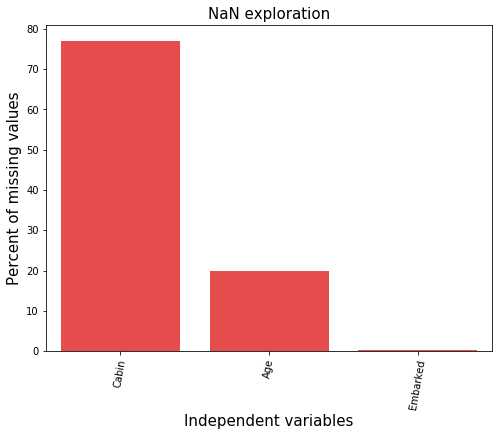

In [6]:
f,ax =plt.subplots(figsize=(8,6))
plt.xticks(rotation='80')
fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
plt.xlabel('Independent variables', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('NaN exploration', fontsize=15)

In [7]:
df_train.isnull().head()
# Создает ДФ тагоже размера с бинарными данными, False/True - пустая ячейка или нет

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [10]:
df_train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [11]:
df_train.isnull().sum().sort_values(ascending = True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

Text(0.5, 1.0, 'Variable exporation')

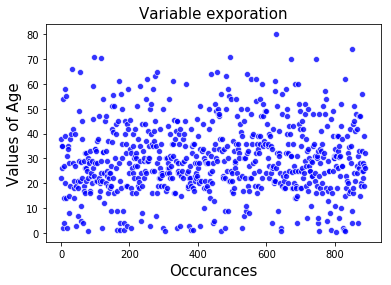

In [12]:
fig = sns.scatterplot(df_train.index, df_train["Age"],color="blue",alpha=0.8)
plt.xlabel('Occurances', fontsize=15)
plt.ylabel('Values of Age', fontsize=15)
plt.title('Variable exporation', fontsize=15)

In [13]:
df_test['Age'].fillna(df_test['Age'].median(), inplace = True)
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)


# For example when trying to exclude the cabin column we are going to receive unnecessary warnings. 
# Exclude! (thats why we imported it)
drop_column = ['Cabin']
df_train.drop(drop_column, axis=1, inplace = True)
df_test.drop(drop_column,axis=1,inplace=True)

df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

In [14]:
df_test['Age'].median()

27.0

In [15]:
df_test['Age'].mean()

29.599282296650717

In [16]:
# TODO: Попробывать 2 гипотизы - замена пропусков Возраста средним значением и медианным

In [17]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

In [18]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
# in order to apply the function only once
all_data=[df_train,df_test]

In [21]:
import re
# A way to think about textual preprocessing is: Given my character column, 
# what are some regularities that occur often. In our case we see titles (miss,mr etc).
# Let us then extract second word from every row and assign it to a new column. 
# Not only that let us make it categorical (so that we can one-hot encode it) 
# where we observe the most frequent ones.

In [22]:
def title_parser(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # Check whether title exists, then return it, if not ""
    if title_search:
        return title_search.group(1)
    return ""

In [23]:
df_train['Name'].apply(title_parser)[:10]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Name, dtype: object

In [24]:
# New column named Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(title_parser)

In [25]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs


In [26]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'irrelevant')
# Let us make sure they are categorical, where we replace similiar names
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [27]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs


In [28]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [29]:
df_train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [30]:
sns.set(style="ticks", color_codes=True)

In [31]:
# TODO:

# g = sns.pairplot(
#     data=df_train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], 
#     hue="Survived", 
#     palette="seismic",
#     palette="husl",
#     height=1.2,
#     diag_kind="kde",
#     diag_kws=dict(shade=True),
#     plot_kws=dict(s=10) 
# )
# g.set(xticklabels=[])

# as a general rule with classification problems, 
# we will always put the target variable (to be classified) in hue

In [32]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
# g = sns.pairplot(
#     data=df_train, 
#     hue="Age",
#     palette="husl"
# )
# g.set(xticklabels=[])

In [34]:
all_data=[df_train,df_test]

# Create new feature FamilySize as a combination of SibSp and Parch
# Сколько членов его семьи, включая его самого, находилось на борту 
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
# create bin for age features
# определение возростной категории
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    

In [35]:
# create bin for fare features
# Категория транспортных расходов
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [36]:
traindf=df_train
testdf=df_test

all_dat=[traindf,testdf]

for dataset in all_dat:
    drop_column = ['Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [37]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2,Adult,Low_fare
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,Adult,high_fare
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1,Adult,median_fare
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2,Adult,high_fare
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1,Adult,median_fare
5,6,0,3,male,28.0,0,0,8.4583,Q,Mr,1,Adult,median_fare
6,7,0,1,male,54.0,0,0,51.8625,S,Mr,1,Elder,high_fare
7,8,0,3,male,2.0,3,1,21.0750,S,Master,5,Children,Average_fare
8,9,1,3,female,27.0,0,2,11.1333,S,Mrs,3,Adult,median_fare
9,10,1,2,female,14.0,1,0,30.0708,C,Mrs,2,Teenage,Average_fare


In [38]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [39]:
traindf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,1,0,3,22.0,1,0,7.2500,2,0,1,...,0,1,0,0,0,1,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,2,1,0,...,0,1,0,1,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,1,1,0,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [40]:
testdf.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,34.5,0,0,7.8292,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,2,1,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,62.0,0,0,9.6875,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,896,3,22.0,1,1,12.2875,3,1,0,0,...,0,1,0,0,0,1,0,1,0,0


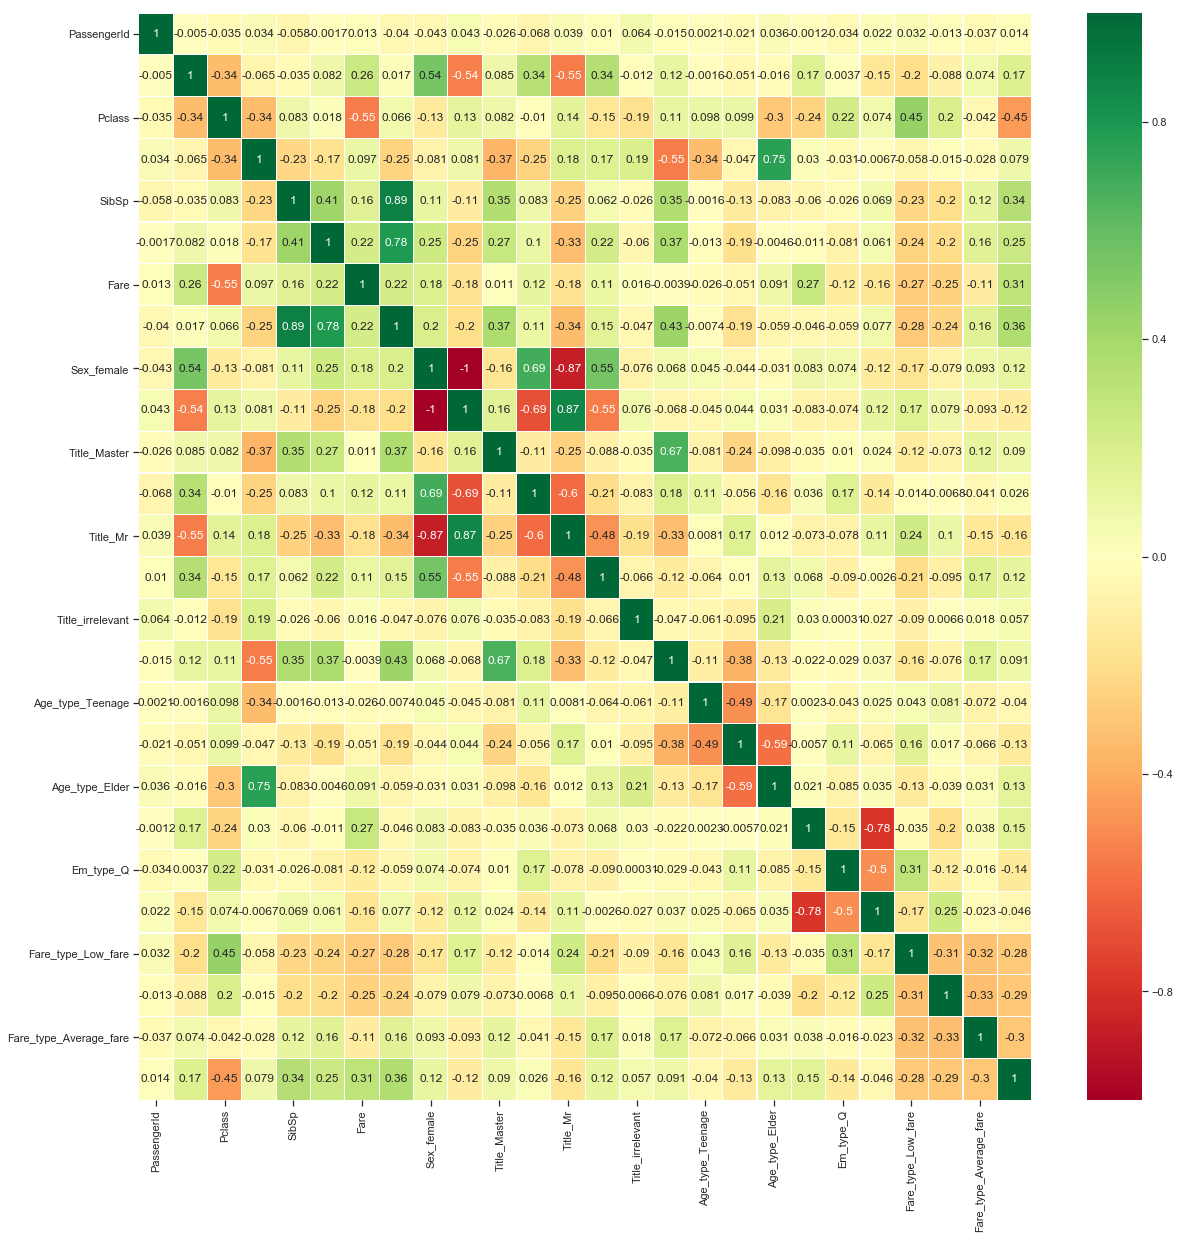

In [41]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler


traindf[['Age','Fare']] = traindf[['Age',"Fare"]].apply(pd.to_numeric)
scaler = MinMaxScaler()
traindf[['Age','Fare']] = scaler.fit_transform(traindf[['Age',"Fare"]])

drop_column = ['PassengerId']
#id of any kind will be always dropped since it does not have predictive power

traindf.drop(drop_column, axis=1, inplace = True)
train_X = traindf.drop("Survived", axis=1)
#we do not need train test splitting with skicit learn 
# (in nomral setting test_df and train_df will be concatanted and then use it)

train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy() 
train_X.shape, train_Y.shape, test_X.shape

((891, 24), (891,), (418, 24))

In [43]:
traindf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,0.271174,1,0,0.014151,2,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,0.472229,1,0,0.139136,2,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,0.321438,0,0,0.015469,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1,1,0.434531,1,0,0.103644,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,3,0.434531,0,0,0.015713,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [44]:
from sklearn.model_selection import train_test_split #split the dat in test and train sets
from sklearn.model_selection import cross_val_score #score evaluation with cross validation
from sklearn.model_selection import cross_val_predict #prediction with cross validation
from sklearn.metrics import confusion_matrix #for confusion matrix (metric of succes)
from sklearn.model_selection import KFold #for K-fold cross validation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts


all_features = traindf.drop("Survived",axis=1) 
#all of the independent variables are necessary 
# for the cross_val function

Targeted_feature = traindf["Survived"]

X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
#why do we have to do it cant we just use test_df ? NO, since we do not have the predictions (that si checked 
# internally in Kaggle) we can not have accuracy on hold-out test)

# eXtreme Gradient Boosting

In [45]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape


import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(train_X,train_Y)


# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 327 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 827 tasks      | elapsed:   27.9s
[Parallel(n_jobs=4)]: Done 1527 tasks      | elapsed:   50.2s
[Parallel(n_jobs=4)]: Done 1913 out of 1920 | elapsed:  1.1min remaining:    0.2s
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:  1.1min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [46]:
modelf.best_score_ #accuracy metric is straightforeward, how much did I predict corrrectly?

0.8383838383838383

# Random Forest parameter tuning and other models:

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
n_estim=range(100,1000,100)

#This is the grid
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)


#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    6.7s remaining:    1.2s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    8.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
model_rf.best_score_

0.8047138047138047

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model =LinearDiscriminantAnalysis()
param_grid = {'tol':[0.001,0.01,.1,.2]}

modell = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modell.fit(train_X,train_Y)

# Best Estimator
modell.best_estimator_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.3s finished
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.001)

In [50]:
modell.best_score_ 

0.8249158249158249

# LogiticRegression

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy 83.21
The cross validated score 81.82


Text(0.5, 1.05, 'Confusion matrix')

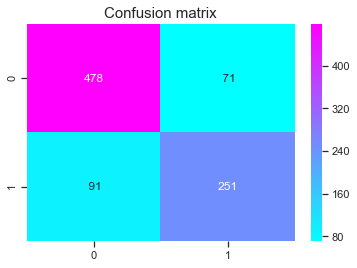

In [51]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import accuracy_score  #for accuracy_score


model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_lr,y_test)*100,2))
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Accuracy 83.58


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

The cross validated score 83.16


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.05, 'Confusion matrix')

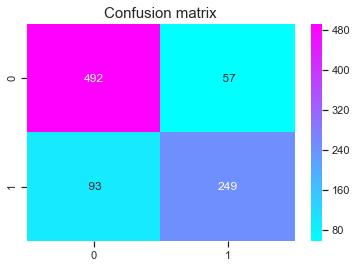

In [52]:
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_svm,y_test)*100,2))
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 80.97
The cross validated score 82.27


Text(0.5, 1.05, 'Confusion matrix')

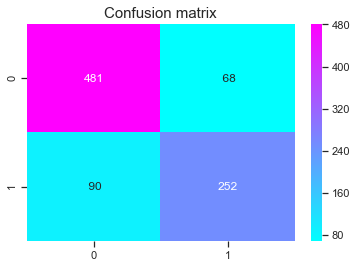

In [53]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_knn,y_test)*100,2))
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)


Accuracy 76.87
The cross validated score 79.02


Text(0.5, 1.05, 'Confusion matrix')

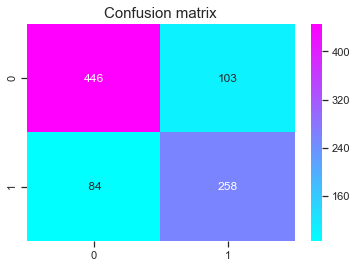

In [54]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_gnb,y_test)*100,2))
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 80.97
The cross validated score 77.91


Text(0.5, 1.05, 'Confusion matrix')

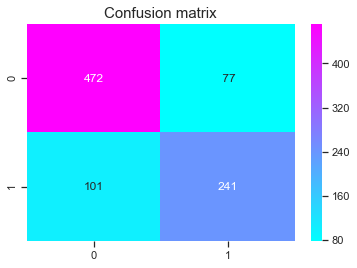

In [55]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_tree,y_test)*100,2))
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 80.97
The cross validated score 81.49


Text(0.5, 1.05, 'Confusion matrix')

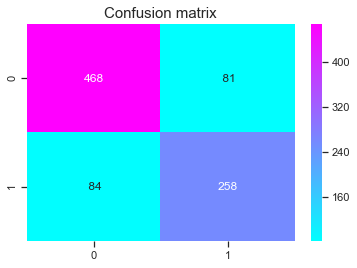

In [56]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_adb,y_test)*100,2))
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 82.84
The cross validated score 82.72


/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn

Text(0.5, 1.05, 'Confusion matrix')

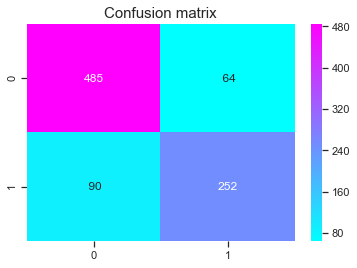

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_lda,y_test)*100,2))
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 82.09
The cross validated score 84.29


Text(0.5, 1.05, 'Confusion matrix')

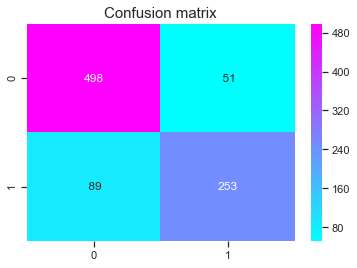

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_gbc,y_test)*100,2))
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)


Accuracy 82.09
The cross validated score 84.06


Text(0.5, 1.05, 'Confusion matrix')

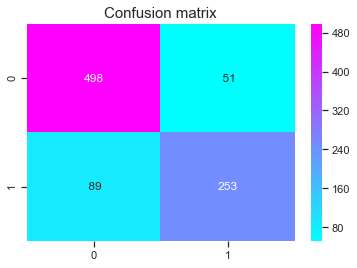

In [59]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model_rf.fit(X_train,y_train)
prediction_rm=model.predict(X_test)


print('Accuracy',round(accuracy_score(prediction_rm,y_test)*100,2))
result_rm=cross_val_score(model_rf,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 77.99
The cross validated score 84.06


Text(0.5, 1.05, 'Confusion matrix')

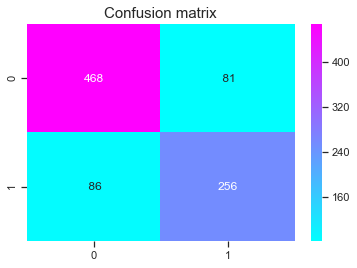

In [60]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model1.fit(X_train,y_train)

prediction_rm1=model1.predict(X_test)

print('Accuracy',round(accuracy_score(prediction_rm1,y_test)*100,2))
result_rm1=cross_val_score(model1,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model1,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)


In [61]:
models = pd.DataFrame({
    'Model': ["support vector machine",'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree',"Tuned RF"],
    'Score': [result_svm.mean(),result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(), result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean(),result_rm1.mean()]})
models.sort_values(by='Score',ascending=False) 

#pd.DAtaFrame() is a function that 
# takes a dictionary as an input. Within this list we determine 
# key-values paires (column name-values within column)

,Model,Score
6,Gradient Decent,0.842892
3,Random Forest,0.840633
0,support vector machine,0.831644
7,Linear Discriminant Analysis,0.827175
1,KNN,0.822667
2,Logistic Regression,0.818249
5,AdaBoostClassifier,0.814877
9,Tuned RF,0.808111
4,Naive Bayes,0.790157
8,Decision Tree,0.779060


In [62]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)
print(acc_random_forest)

98.2


Feature selection


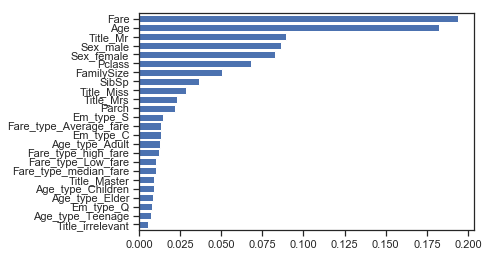

In [63]:
print("Feature selection")
pd.Series(random_forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8) 
#in a series x (theirs relative importance) and y values are taken

In [65]:
df_predict = pd.DataFrame({"PassengerId": df_test["PassengerId"], "Survived": Y_pred_rf})

In [66]:
df_predict.to_csv("../data/processed/0_1_understandable_titanic_submission.csv", sep=",", index=False)